In [84]:
#importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [85]:
#importing data
data=pd.read_csv('train.csv')

In [86]:
#my implementation of splitting the dataset but in the code below i have shown how to use the same function provided by sklearn 
def split_train_set(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_size)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [87]:
#splitting the dataset train.csv into train and cross validation set using sklearn library function
from sklearn.model_selection import train_test_split
train_set,cross_set=train_test_split(data,test_size=0.1,random_state=42)
df=train_set
df_cross=cross_set

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460878 entries, 153527 to 121958
Data columns (total 11 columns):
ID                    460878 non-null int64
Day_No                460878 non-null int64
Course_ID             460878 non-null int64
Course_Domain         460878 non-null object
Course_Type           460878 non-null object
Short_Promotion       460878 non-null int64
Public_Holiday        460878 non-null int64
Long_Promotion        460878 non-null int64
User_Traffic          460878 non-null int64
Competition_Metric    459290 non-null float64
Sales                 460878 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 42.2+ MB


In [89]:
df.head()

ID  Day_No  Course_ID       Course_Domain Course_Type  \
153527  164328     104        181  Software Marketing      Course   
303438  324679     595        355         Development     Program   
250890  268471     561        294         Development      Course   
399375  427456     400        469         Development     Program   
116825  125046      40        138  Software Marketing     Program   

        Short_Promotion  Public_Holiday  Long_Promotion  User_Traffic  \
153527                0               0               0         13020   
303438                1               0               0         20832   
250890                1               0               1         19089   
399375                1               0               1         23583   
116825                0               0               1         13062   

        Competition_Metric  Sales  
153527               0.261    135  
303438               0.091    200  
250890               0.024    165  
399375               0.117    220  
116825               0.229    127

In [90]:
df.shape

(460878, 11)

In [91]:
#pre -processing the data

In [92]:
#competition metric has some missing values
df["Competition_Metric"].notnull()

153527    True
303438    True
250890    True
399375    True
116825    True
          ... 
259178    True
365838    True
131932    True
146867    True
121958    True
Name: Competition_Metric, Length: 460878, dtype: bool

In [93]:
#using imputer of sklearn to deal with missing values

In [94]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy="median")#we wll be replacing the missing values by the median of that feature
data_temp=df.drop(["ID","Day_No","Course_ID","Course_Domain","Course_Type"],axis=1)
#applying imputer to the numeric values
imputer.fit(data_temp)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [95]:
#alternate method for replacing values 
median=df["Competition_Metric"].median()
df["Competition_Metric"].fillna(median)

153527    0.261
303438    0.091
250890    0.024
399375    0.117
116825    0.229
          ...  
259178    0.000
365838    0.172
131932    0.005
146867    0.019
121958    0.008
Name: Competition_Metric, Length: 460878, dtype: float64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460878 entries, 153527 to 121958
Data columns (total 11 columns):
ID                    460878 non-null int64
Day_No                460878 non-null int64
Course_ID             460878 non-null int64
Course_Domain         460878 non-null object
Course_Type           460878 non-null object
Short_Promotion       460878 non-null int64
Public_Holiday        460878 non-null int64
Long_Promotion        460878 non-null int64
User_Traffic          460878 non-null int64
Competition_Metric    459290 non-null float64
Sales                 460878 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 42.2+ MB


In [97]:
#df.head()

In [98]:
#cleaning data by removing the redundant columns
df=df.drop(["ID","Day_No","Course_ID"],axis=1)

In [99]:
df.head()

Course_Domain Course_Type  Short_Promotion  Public_Holiday  \
153527  Software Marketing      Course                0               0   
303438         Development     Program                1               0   
250890         Development      Course                1               0   
399375         Development     Program                1               0   
116825  Software Marketing     Program                0               0   

        Long_Promotion  User_Traffic  Competition_Metric  Sales  
153527               0         13020               0.261    135  
303438               0         20832               0.091    200  
250890               1         19089               0.024    165  
399375               1         23583               0.117    220  
116825               1         13062               0.229    127

In [100]:
df['Course_Domain'].describe()
df['Course_Domain'].unique()


array(['Software Marketing', 'Development', 'Finance & Accounting',
       'Business'], dtype=object)

In [101]:
df.describe()

Short_Promotion  Public_Holiday  Long_Promotion   User_Traffic  \
count    460878.000000   460878.000000   460878.000000  460878.000000   
mean          0.380313        0.031618        0.488637   15375.395792   
std           0.485464        0.174981        0.499871    7726.555659   
min           0.000000        0.000000        0.000000     168.000000   
25%           0.000000        0.000000        0.000000   10584.000000   
50%           0.000000        0.000000        0.000000   13776.000000   
75%           1.000000        0.000000        1.000000   18123.000000   
max           1.000000        1.000000        1.000000   97335.000000   

       Competition_Metric          Sales  
count       459290.000000  460878.000000  
mean             0.073387     120.803592  
std              0.100235      54.345767  
min              0.000000       0.000000  
25%              0.010000      84.000000  
50%              0.035000     111.000000  
75%              0.094000     146.000000  
max              0.768000     682.000000

In [102]:
#df.shape[0]

In [103]:
df['Course_Domain'].value_counts()

Development             237933
Software Marketing      149454
Finance & Accounting     69514
Business                  3977
Name: Course_Domain, dtype: int64

In [104]:
df['Course_Type'].value_counts()
#df['Course_Type'].unique()


Course     236689
Program    222612
Degree       1577
Name: Course_Type, dtype: int64

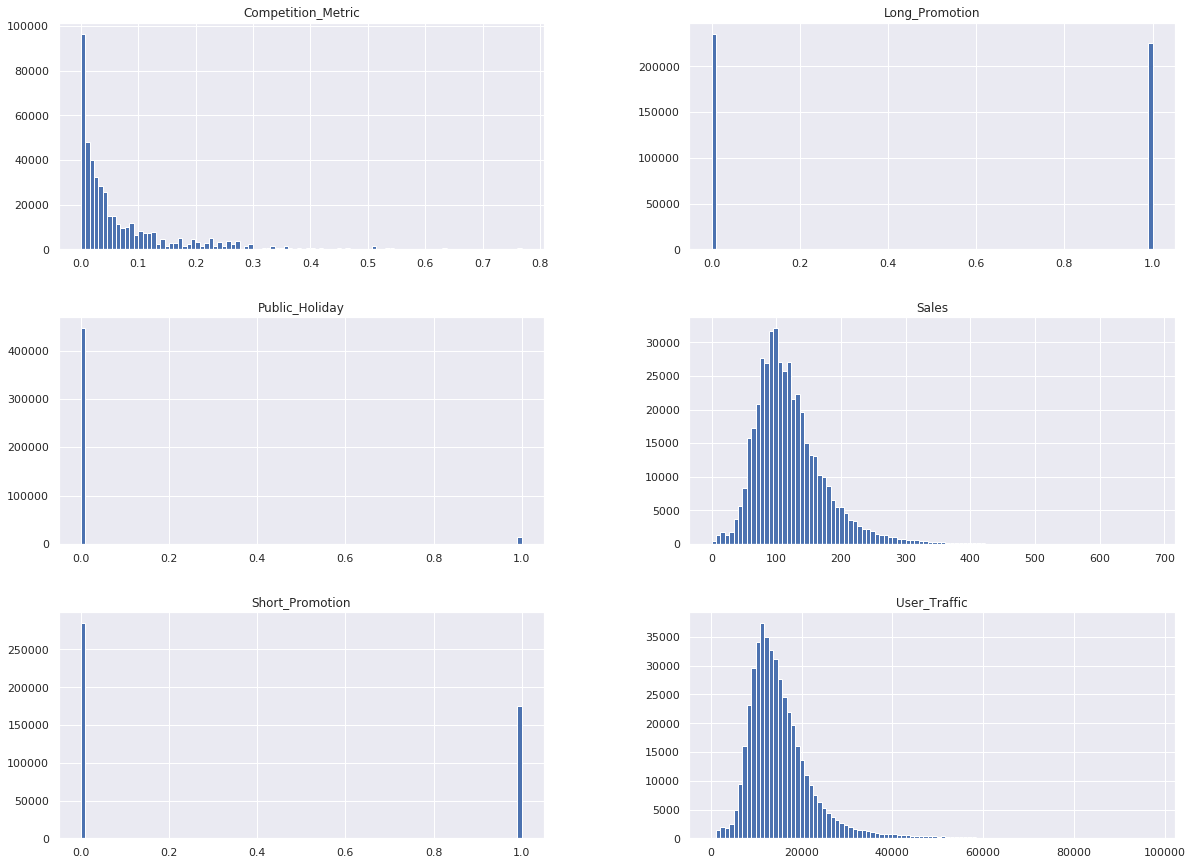

In [105]:
df.hist(bins=100,figsize=(20,15))
plt.show()

In [106]:
#this shows that user_traffic,competition_metric and sales colums can be used for data analysis

In [107]:
corr_matrix=df.corr()

In [108]:
corr_matrix["Sales"].sort_values(ascending=False)

Sales                 1.000000
User_Traffic          0.830030
Short_Promotion       0.367048
Competition_Metric   -0.022415
Long_Promotion       -0.109504
Public_Holiday       -0.135380
Name: Sales, dtype: float64

In [109]:
#conclusion 
#from correlation matrix is that user_traffic is in correlation with sales,
#and short promotio is also correlated to sales

In [110]:
#preprocessing the categorail data before sending to ml algorithm 
#one vs all method is used in one hot encoding
#converting categorial data to one hot encoding
from sklearn.preprocessing import LabelBinarizer

In [111]:
df_cat=df["Course_Domain"]
encoder=LabelBinarizer()
df_1hot=encoder.fit_transform(df_cat)
print(encoder.classes_)
df_1hot.shape

['Business' 'Development' 'Finance & Accounting' 'Software Marketing']


(460878, 4)

In [112]:
df_cat=df_cross["Course_Domain"]
encoder=LabelBinarizer()
df_1hot_cross=encoder.fit_transform(df_cat)
print(encoder.classes_)
df_1hot_cross.shape

['Business' 'Development' 'Finance & Accounting' 'Software Marketing']


(51209, 4)

In [113]:
df_cat=df["Course_Type"]
encoder=LabelBinarizer()
df_2hot=encoder.fit_transform(df_cat)
print(encoder.classes_)
df_2hot

['Course' 'Degree' 'Program']


array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [114]:
#Scaling the data so that during gradient descent the process is not slow  in reaching the optimum
#i will be using sklearn pipeline to do scaling

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [116]:
df1=df[df.columns[0:5]]#we dont have to apply scaling on this data
df2=df[df.columns[5:]]#we have to apply scaling on this data
df2.head()

User_Traffic  Competition_Metric  Sales
153527         13020               0.261    135
303438         20832               0.091    200
250890         19089               0.024    165
399375         23583               0.117    220
116825         13062               0.229    127

In [117]:
num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])
df2_trans=num_pipeline.fit_transform(df2)
df2_trans#contains the scaled values of the last three columns

array([[-0.30484455,  1.87174162,  0.26122408],
       [ 0.70621508,  0.17572253,  1.45727069],
       [ 0.4806292 , -0.49270852,  0.81324559],
       ...,
       [ 0.27678653, -0.68226359,  0.26122408],
       [-1.23708501, -0.54259143, -1.39484045],
       [-0.32658776, -0.65233385,  0.11401835]])

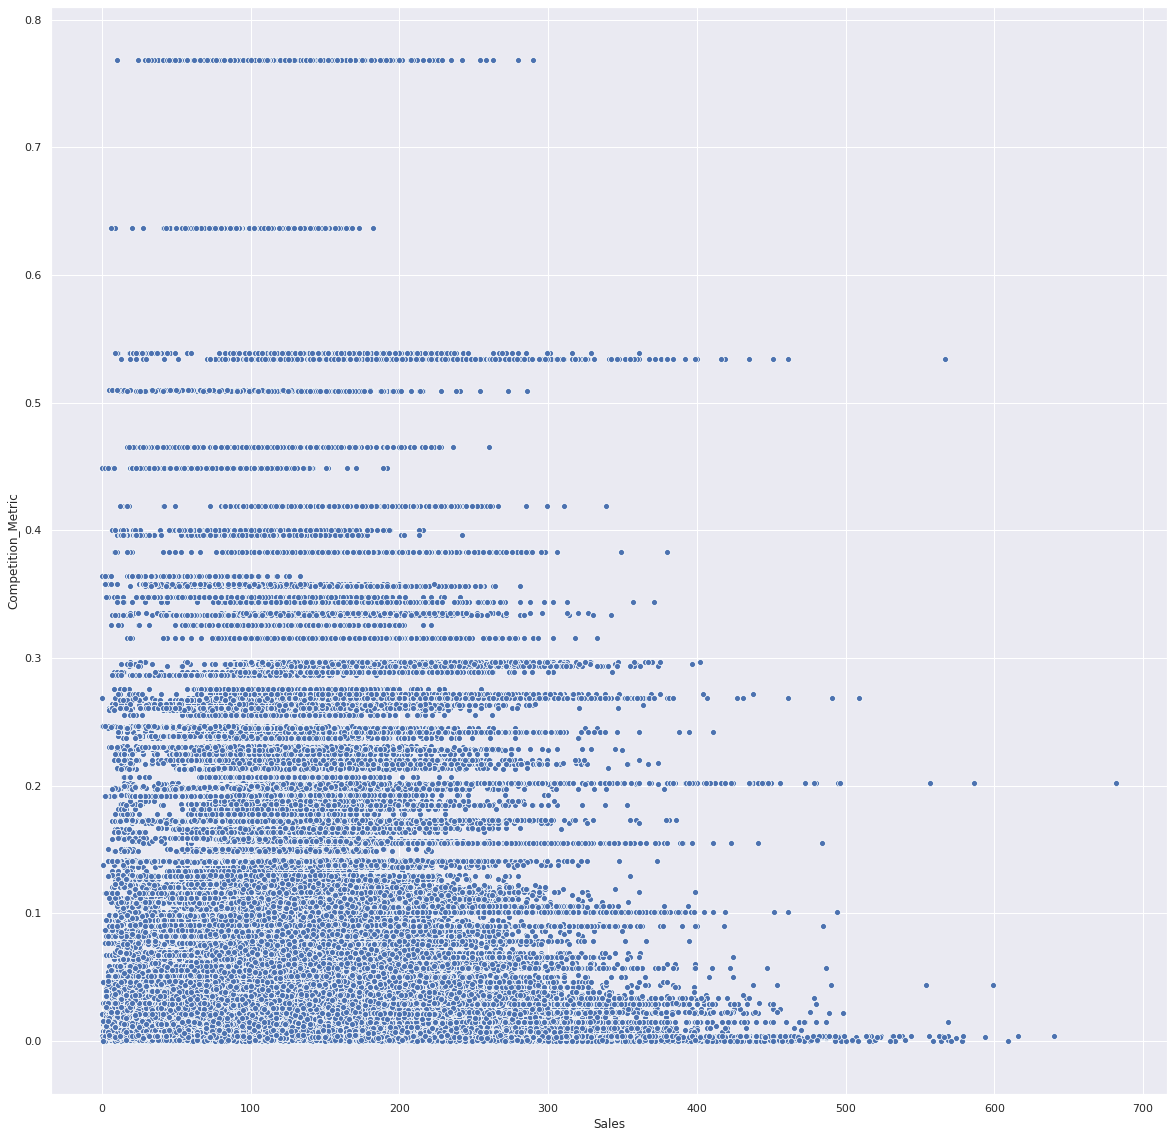

In [118]:
sns.scatterplot(x=df2["Sales"],y=df2["Competition_Metric"])

In [119]:
#the above plot shows that there is no meaningful relation between sales and competiton 

In [120]:
course_domain_mod=np.zeros(df.shape[0])
course_domain_mod.shape

(460878,)

In [121]:
#course_domain_mod.reshape(512087,1)


In [122]:
df.loc[:,"Course_Domain_mod"]=course_domain_mod
df["Course_Domain_mod"].shape

(460878,)

In [123]:
#target=df["Course_Domain"]
#for i,val in enumerate(target):

#    if(val=='Development'): df["Course_Domain_mod"][i]=1;
#    elif(val=='Software Marketing'):df["Course_Domain_mod"][i]=2;
#    elif(val=='Finance & Accounting'):df["Course_Domain_mod"][i]=3;
#    elif(val=='Business'):df["Course_Domain_mod"][i]=4;
    

In [124]:
#df["Course_Domain_mod"].value_counts()
#df["Course_Domain_mod"].shape

In [125]:
df["Course_Domain_mod"].describe()

count    460878.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Course_Domain_mod, dtype: float64

In [126]:
#df["Course_Domain"].value_counts()

In [127]:
#df.head()

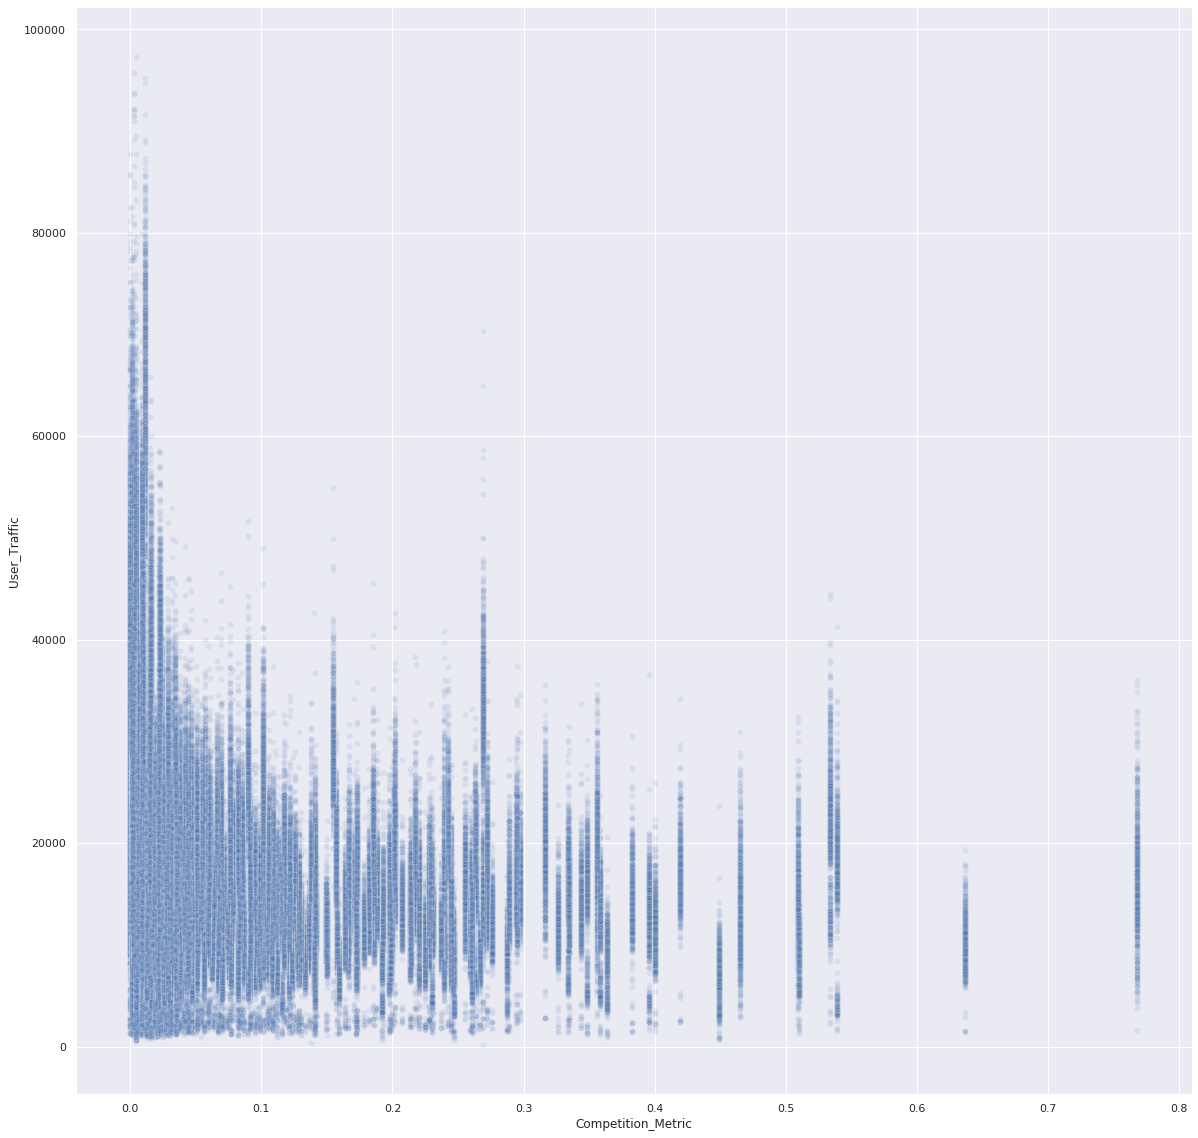

In [128]:
sns.scatterplot(x=df["Competition_Metric"],y=df["User_Traffic"],alpha=0.1)

In [129]:
#from the above plot it is clear that 

In [154]:
#df.plot(kind="scatter",x="Sales",y="User_Traffic",alpha=0.1,s=df["Course_Domain_mod"]*5,figsize=(20,20))


In [131]:
sns.set(rc={'figure.figsize':(20,20)})

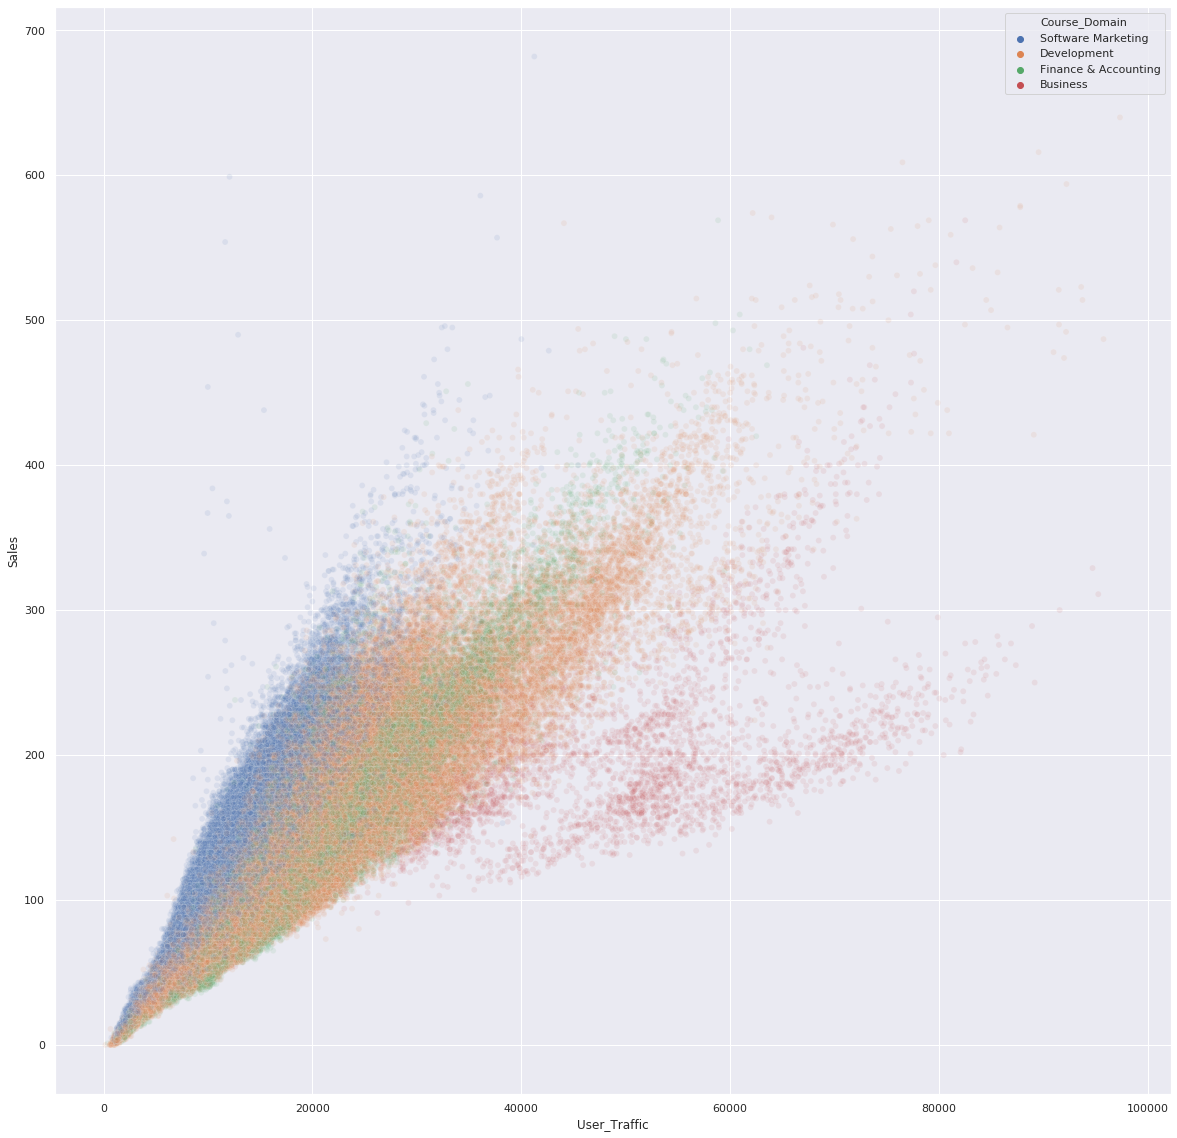

In [132]:
#inferences from this plot
#business courses have less sales/user_traffic which indicates that users easily dont buy business courses as they tend to be costly and less useful
#software marketing has highest sales/user_traffic which indicates that these are very helpful in people's career and they tend to buy them easily
#this plot also indicates that highest no.of people buy/study development courses as they tend to be easier for everyone
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],hue=df["Course_Domain"],alpha=0.1)

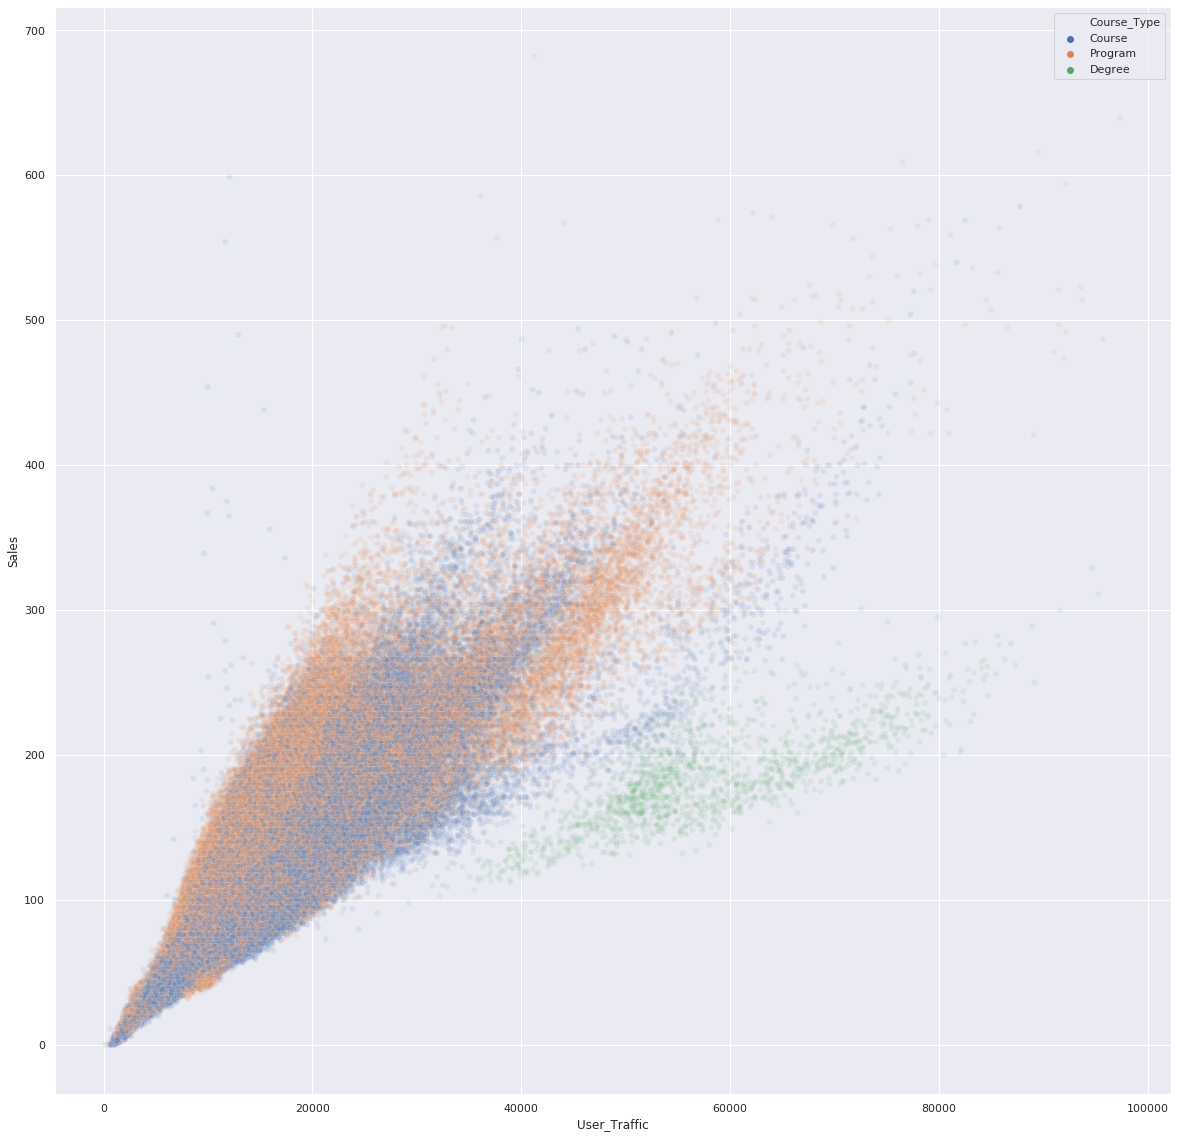

In [133]:
#inference from this plot is that 
#courses have more sales/user_traffic which means that most users buy a course who see the course,which indicates that they are cheaper and hence preffered by people
#degree has less sales/user_traffic which indicates that most users dont tend to buy degree easily upon seeing it as they are costly and time consuming
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],hue=df["Course_Type"],alpha=0.1)

In [134]:
#the above plot also shows that user traffic and sales are not correlatd much for business domain

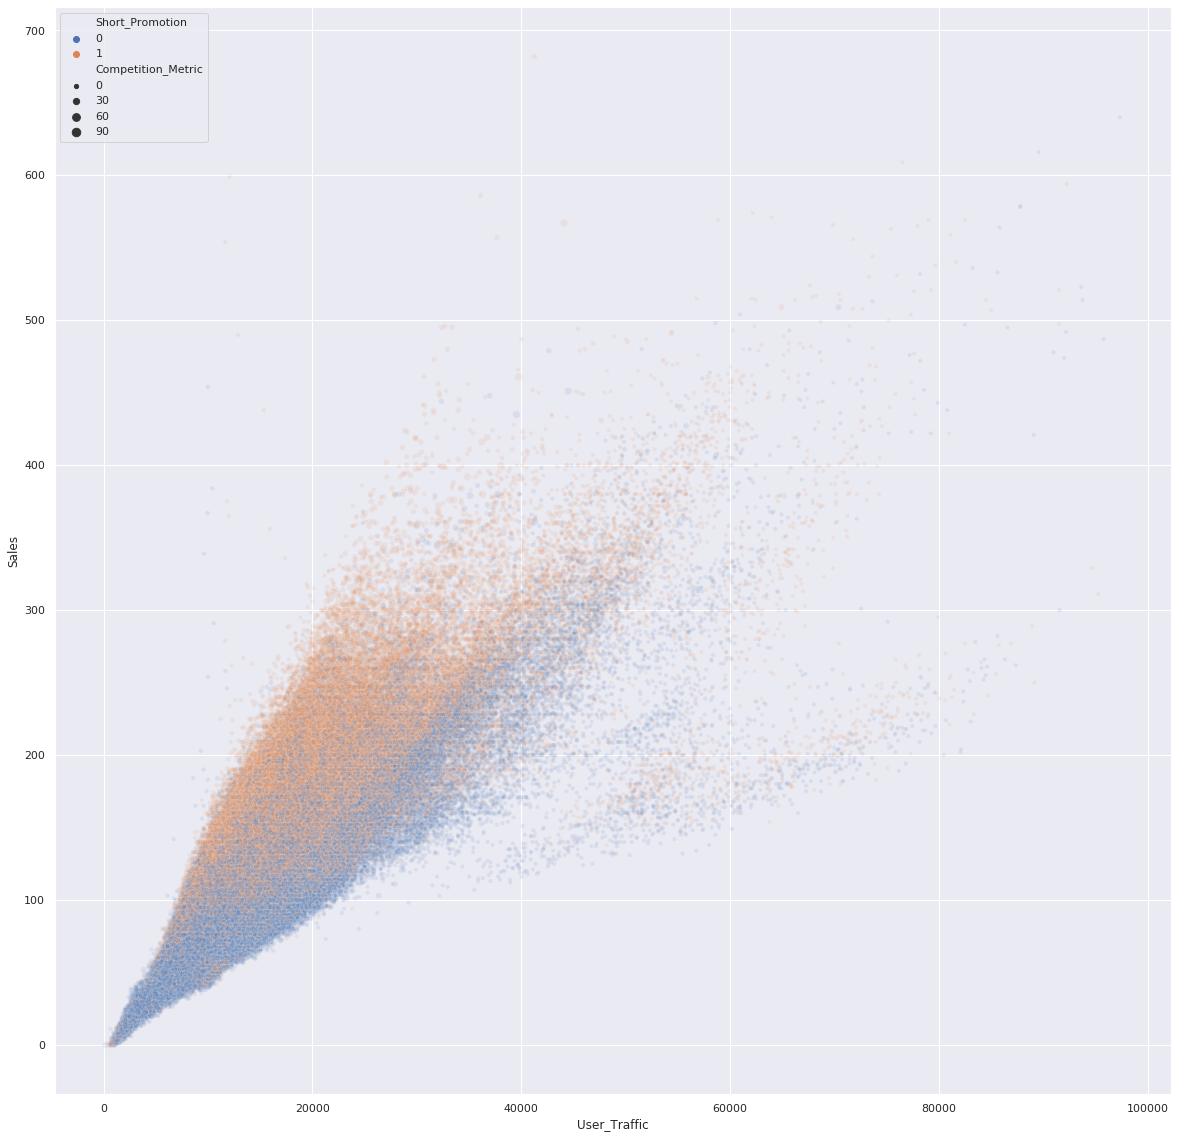

In [135]:
#inference from this graph
#in a job where there is one short promotion ,sales/user_traffic rises as people are attracted toward that course
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],size=df["Competition_Metric"]*100,alpha=0.1,hue=df["Short_Promotion"])

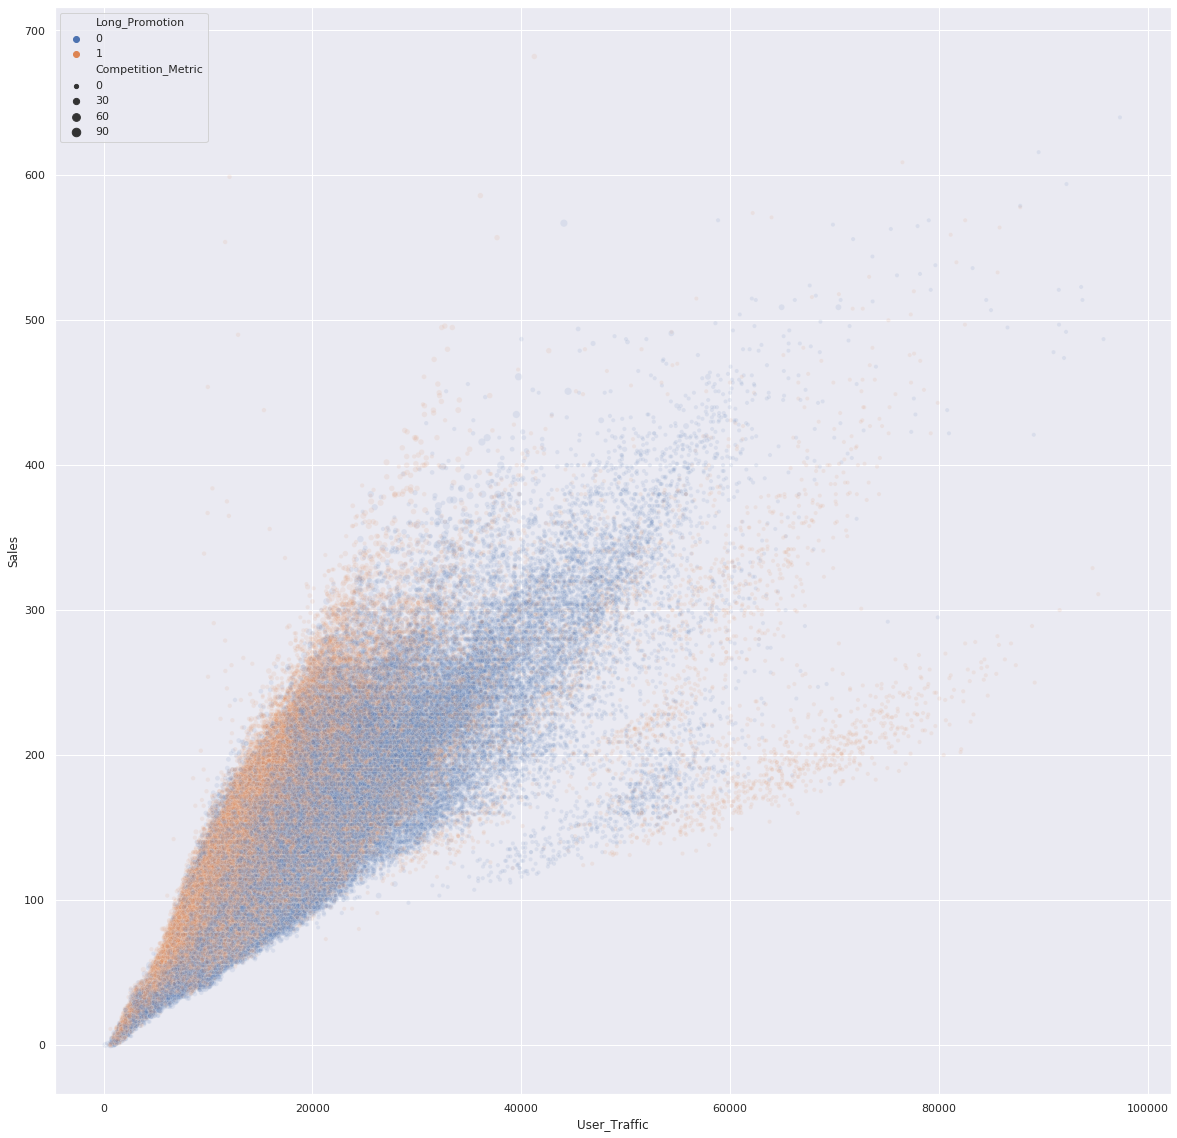

In [136]:
#inference from this graph
#in a job where there is one short promotion ,sales/user_traffic rises as people are attracted toward that course
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],size=df["Competition_Metric"]*100,alpha=0.1,hue=df["Long_Promotion"])

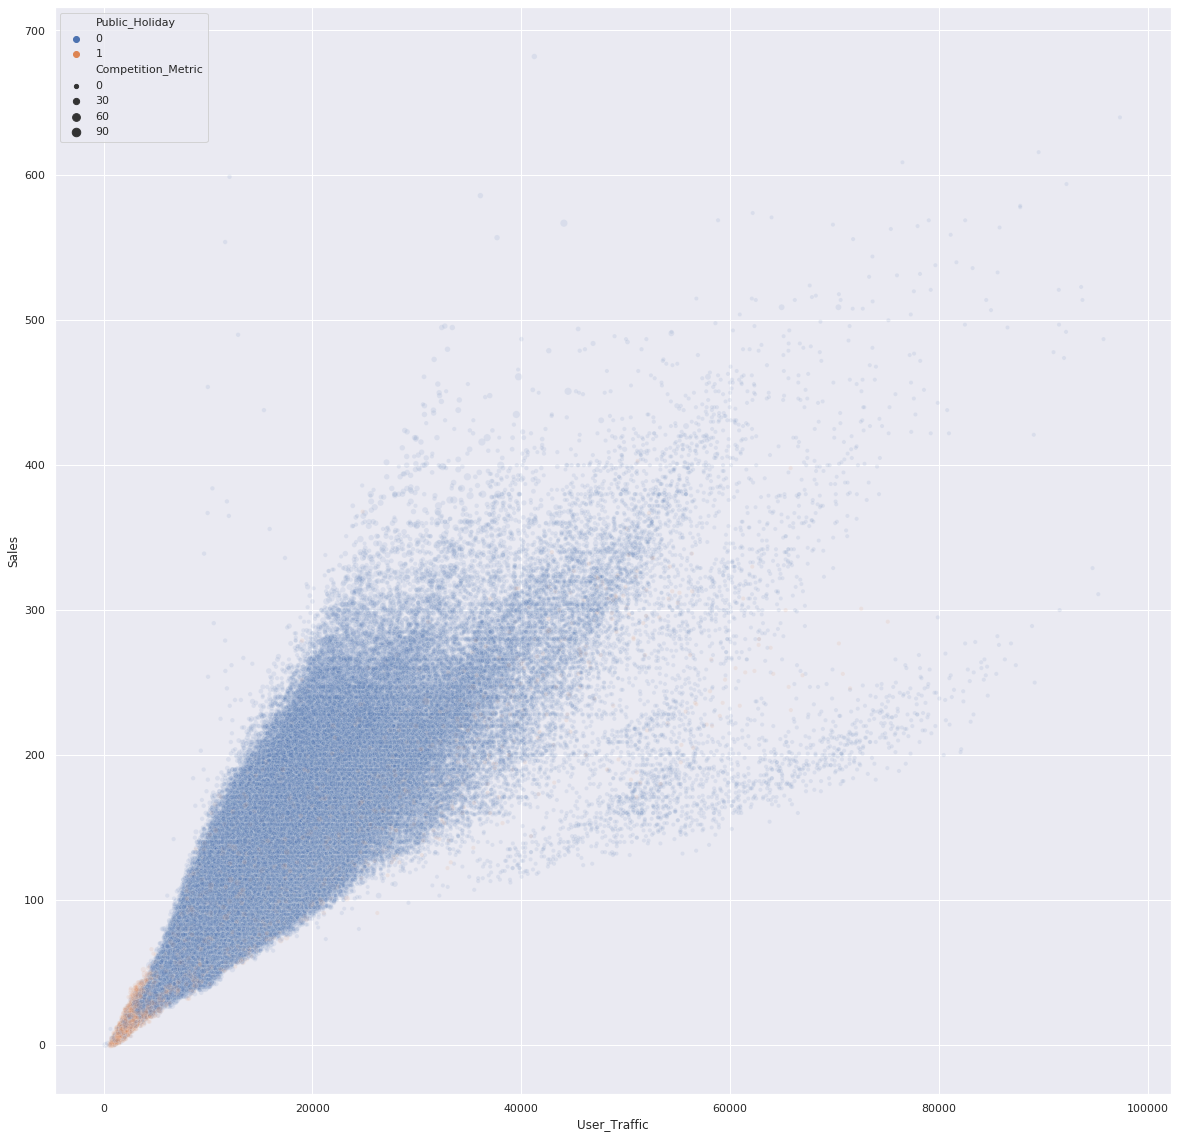

In [137]:
#inference is that usually high sales or high user_traffic forces the employees to have zero public holidays 
sns.scatterplot(x=df["User_Traffic"],y=df["Sales"],size=df["Competition_Metric"]*100,alpha=0.1,hue=df["Public_Holiday"])

In [138]:
#we can also declare a new feature based on the slope of the above graph

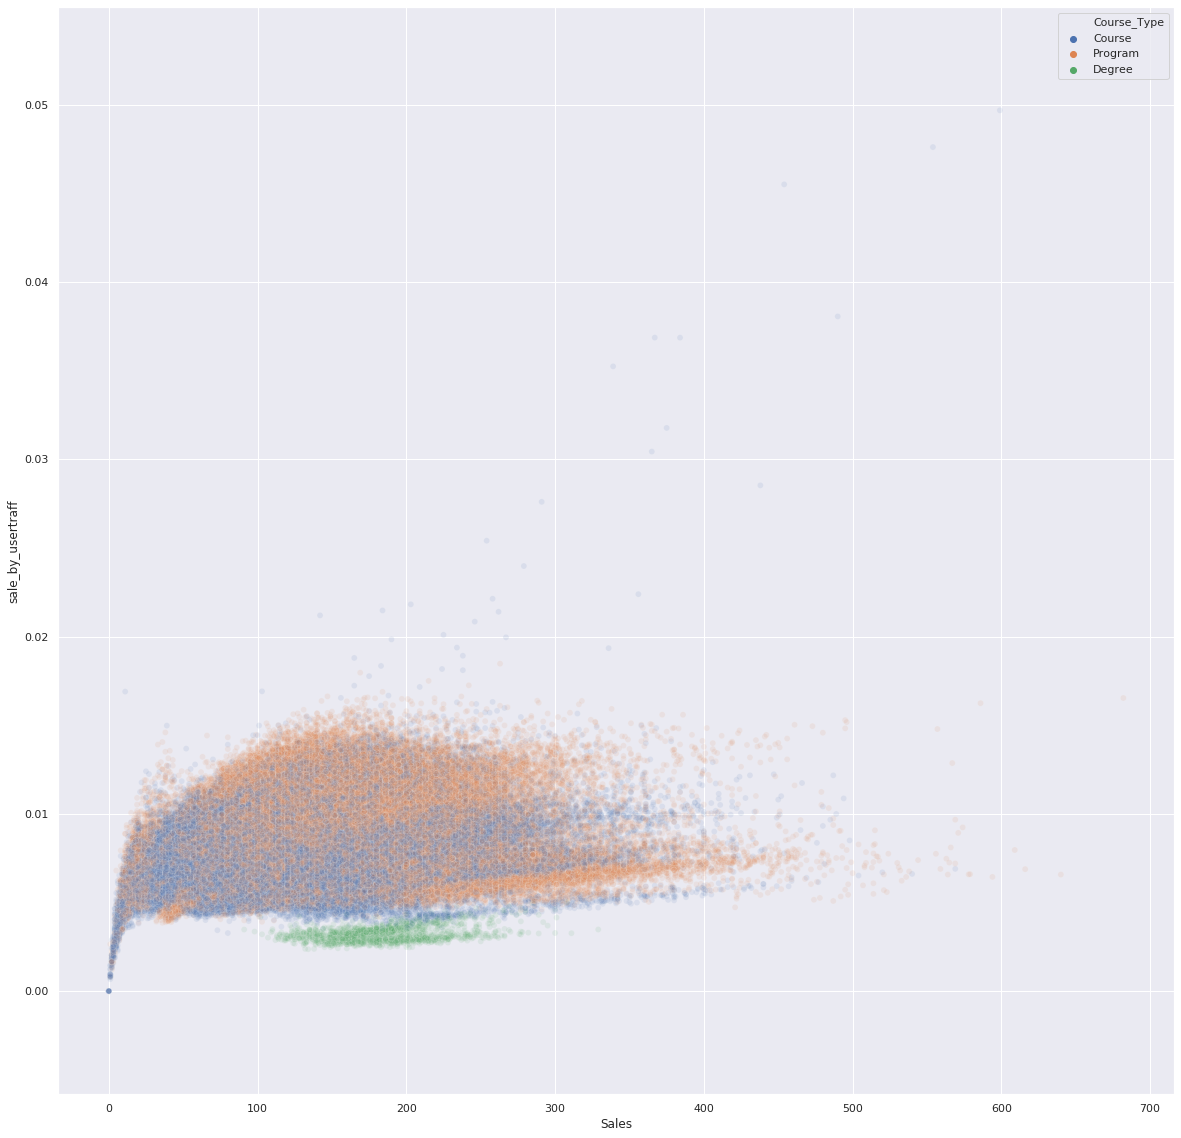

In [139]:
#new feature
df["sale_by_usertraff"]=df["Sales"]/df["User_Traffic"]
sns.scatterplot(x=df["Sales"],y=df["sale_by_usertraff"],hue=df["Course_Type"],alpha=0.1)

In [155]:
#sns.pairplot(df)

In [141]:
#from all this analysis it is clear that the features selectd for the model should be sale and user_traffic

In [142]:
#now we willl be training the model to predict sales from user_traffic using linear regression as 

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
#a=df["User_Traffic"].reshape(-1,1)

In [145]:
#training the linearRgression model on the data
lin_reg=LinearRegression()
lin_reg.fit(df["User_Traffic"].values.reshape(-1,1),df["Sales"].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
df_cross.head()

ID  Day_No  Course_ID         Course_Domain Course_Type  \
306474  327955     103        359    Software Marketing     Program   
256834  274835     515        301  Finance & Accounting     Program   
121832  130353     637        143    Software Marketing     Program   
444789  476050     356        522           Development     Program   
279276  298837     393        327           Development      Course   

        Short_Promotion  Public_Holiday  Long_Promotion  User_Traffic  \
306474                0               0               1         11907   
256834                0               0               1         13314   
121832                1               0               0         12180   
444789                0               0               1         25074   
279276                0               0               1          6279   

        Competition_Metric  Sales  
306474               0.038     76  
256834               0.033    115  
121832               0.008    129  
444789               0.047    222  
279276               0.015     48

In [147]:
#predicting the data using the trained model
print("predictions\n",lin_reg.predict(df_cross["User_Traffic"][0:10].values.reshape(-1,1)))

predictions
 [[100.55466227]
 [108.76890489]
 [102.14847054]
 [177.42526104]
 [ 67.69769183]
 [107.91070043]
 [143.58748551]
 [ 96.38624065]
 [173.62464132]
 [174.85064768]]


In [148]:
#actual values stored
print("actual\n",df_cross["Sales"][0:10].values)

actual
 [ 76 115 129 222  48 107 167  81 147 177]


In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
#calculating and displaying the squared error of the model
prd=lin_reg.predict(df_cross["User_Traffic"][0:10].values.reshape(-1,1))
lin_mse=mean_squared_error(prd,df_cross["Sales"][0:10].values)
lin_rmse=np.sqrt(lin_mse)
lin_rmse
                    

22.88421265738279

In [ ]:
#we are trying to predict the domain of course using sales/usr_traffic data as from the graph it is clear that the values of one domain lie close to each other

In [151]:
lin_reg.fit(df["sale_by_usertraff"].values.reshape(-1,1),df_1hot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
print("predictions\n",lin_reg.predict((df_cross["Sales"]/df_cross["User_Traffic"]).values.reshape(-1,1)))

predictions
 [[ 0.02408008  0.66847716  0.21434222  0.09310054]
 [ 0.00385825  0.46925868  0.13121802  0.39566505]
 [-0.01366298  0.29664559  0.05919497  0.65782243]
 ...
 [ 0.02760119  0.70316593  0.22881616  0.04041673]
 [ 0.00457634  0.4763331   0.13416983  0.38492073]
 [ 0.02555284  0.68298632  0.22039619  0.07106465]]


In [153]:
print("actual\n",df_1hot_cross)

actual
 [[0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]


In [158]:
prd=lin_reg.predict((df_cross["Sales"]/df_cross["User_Traffic"]).values.reshape(-1,1))
lin_mse=mean_squared_error(prd,df_1hot_cross)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.3566734745061467